In [5]:
import json
from pycocotools.coco import COCO
with open('../data/labels/train.json', encoding='utf-8') as f:
    coco = COCO('../data/labels/train.json')




loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


# coco Data Format / Pycocotools 활용 방법
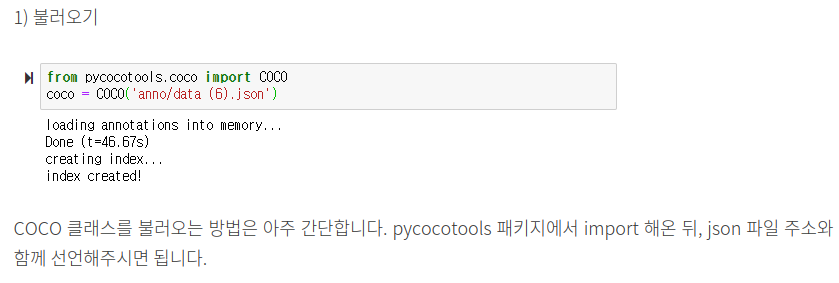
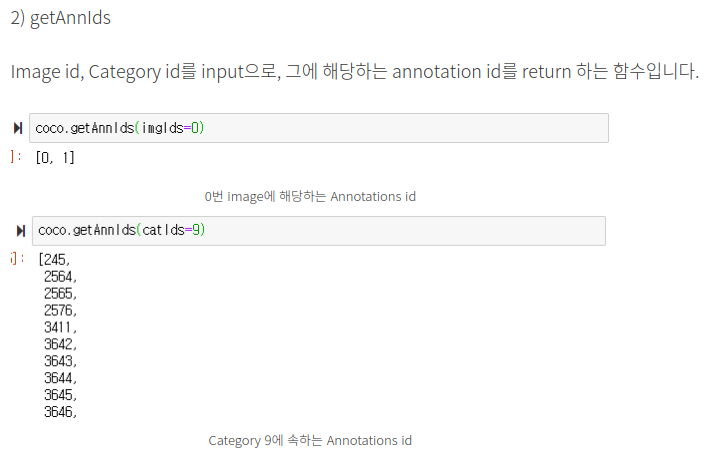
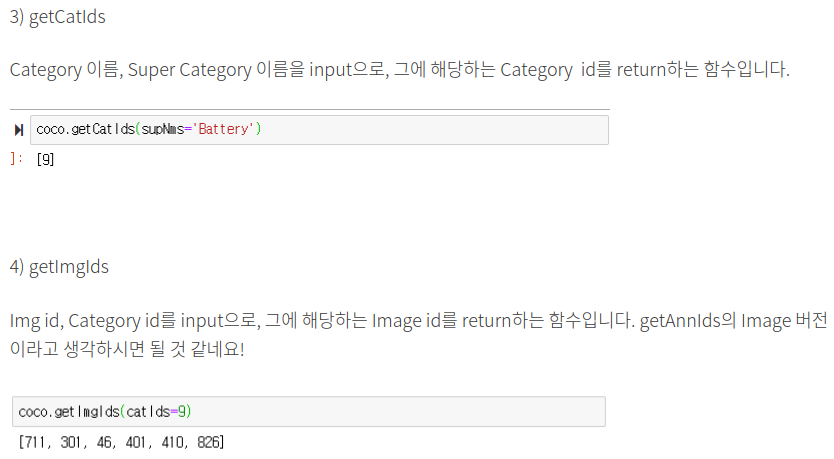
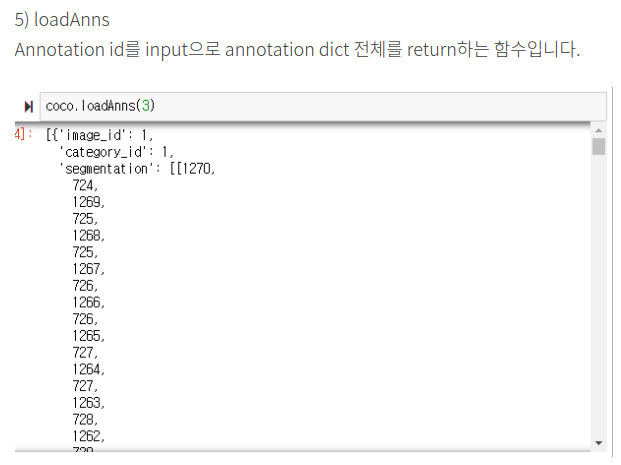
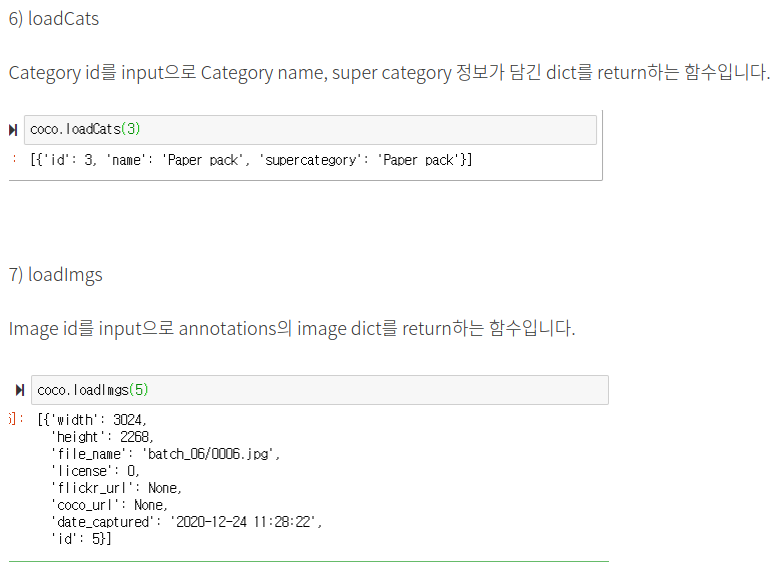

In [48]:
# coco json 파일에서 카테고리 ID 정보 가져오기
type(coco.getCatIds())

list

In [72]:
coco.getImgIds(imgIds=9)

[9]

In [64]:
coco.loadAnns(46)

[{'id': 46,
  'image_id': 487,
  'category_id': 2,
  'segmentation': [],
  'area': 16532.4267,
  'bbox': [14.45, 164.95, 171.09, 96.63],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

In [22]:
# 
coco.getAnnIds(catIds=2)

[46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 60,
 62,
 63,
 64,
 65,
 75,
 76,
 77,
 84,
 86,
 87,
 88,
 89,
 94,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 124,
 125,
 135,
 137,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 193,
 196,
 199,
 205,
 206,
 207,
 209,
 210,
 211,
 213,
 214,
 216,
 217,
 218,
 219,
 223,
 224,
 236,
 710,
 711,
 712,
 713,
 714,
 715,
 751,
 752,
 754,
 940,
 941,
 942,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 1049,
 1057,
 1058,
 1059,
 1127,
 1173,
 1197,
 3078,
 3089,
 3091,
 3092,
 3093,
 3094,
 3095,
 3229,
 3230,
 3233,
 3234,
 3235,
 3236,
 3238,
 3239,
 3257,
 3259,
 3260,
 3262,
 3263,
 3264,
 3265,
 3402,
 3404,
 3405,
 3517,
 3571,
 3572,
 3578,
 3580,
 3581,
 3586,
 3587,
 3588,
 3589,
 3593,
 3799,
 3800,
 3801,
 3803,
 3886,
 3896,
 3897,
 3898,
 3899,
 3900,
 4136,
 4138,
 4139,
 4144,
 4145,
 4146,
 4147,
 4148,
 4149,
 4150,
 4151,
 4152,
 4153,
 4154,

In [23]:
# 해당하는 Image ID를 return 하는 함수
coco.getImgIds(catIds=0)

[15361,
 24070,
 139783,
 24072,
 16907,
 24075,
 24076,
 105495,
 99352,
 99353,
 105496,
 105497,
 105500,
 14367,
 105503,
 105509,
 105510,
 140837,
 140838,
 26668,
 24110,
 24111,
 26670,
 26671,
 26672,
 26673,
 26674,
 99393,
 99394,
 99397,
 140388,
 140389,
 141269,
 111218,
 111219,
 95349,
 111226,
 111227,
 111228,
 111229,
 111230,
 111231,
 26255,
 26257,
 50328,
 95398,
 95399,
 99497,
 14509,
 139957,
 139959,
 50367,
 36032,
 95427,
 95428,
 139974,
 32474,
 32476,
 32478,
 32479,
 144609,
 144610,
 111844,
 142059,
 142060,
 142061,
 99574,
 111876,
 140794,
 63254,
 63255,
 63256,
 63257,
 63259,
 63260,
 149790,
 63263,
 63264,
 149791,
 63266,
 63267,
 63268,
 63270,
 144681,
 144682,
 99115,
 144683,
 63277,
 63278,
 86834,
 99123,
 63323,
 63324,
 63325,
 99185,
 99186,
 141193,
 141194,
 141197,
 100238,
 15247,
 100239,
 140183,
 140188,
 100267,
 100268,
 100269,
 100270,
 100271,
 100272,
 16829,
 100285,
 139198,
 146935,
 100293,
 41416,
 100296,
 100297,


In [42]:
# Image id를 input으로 annotations의 image dict를 return 하는 함수
coco.loadImgs(123686)

[{'id': 123686,
  'width': 640,
  'height': 480,
  'file_name': 'train_86639.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [ ]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

adjust_label = 1

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1 + adjust_label

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2 + adjust_label

    return 0 + adjust_label

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
    
    img = img.cpu().permute(1,2,0)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 2 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [45]:
import tensorflow as tf

import tensorflow_hub as hub



import matplotlib.pyplot as plt

import tempfile

from six.moves.urllib.request import urlopen

from six import BytesIO



import numpy as np

from PIL import Image

from PIL import ImageColor

from PIL import ImageDraw

from PIL import ImageFont

from PIL import ImageOps
 


import time

import os

2023-11-05 16:17:16.167767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 16:17:16.167803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 16:17:16.167835: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 16:17:16.174688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 16:17:16.878665: W tensorflow/compiler/

In [ ]:
def display_image(image):

  fig = plt.figure(figsize=(10, 8))

  plt.grid(False)

  plt.axis('off')

  plt.imshow(image)

In [ ]:
def draw_bounding_box_on_image(image, ymin, xmin, ymax,

                               xmax, color, font, thickness=4,

                               display_str_list=()):

  # 이미지에 경계상자 그리기

  draw = ImageDraw.Draw(image)

  im_width, im_height = image.size #이미지 원사이즈

  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,

                                ymin * im_height, ymax * im_height)

  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),

             (left, top)],width=thickness, fill=color)



  # 이미지 상단에 글자넣기

  # 만약 박스이미지가 이미지를 초과하면 하단에 글씨를 넣는다

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]



  # 각각의 디스플레이마다 상단과 하단의 여백을 0.05로 설정한다.

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)



  if top > total_display_str_height:

    text_bottom = top

  else:

    text_bottom = bottom + total_display_str_height



  for display_str in display_str_list[::-1]:

    text_width, text_height = font.getsize(display_str)

    margin = np.ceil(0.05 * text_height)

    draw.rectangle([(left, text_bottom - text_height - 2 * margin),

                    (left + text_width, text_bottom)],

                   fill=color)

    draw.text((left + margin, text_bottom - text_height - margin),

              display_str,fill="black",font=font)

    text_bottom -= text_height - 2 * margin

In [ ]:
#박스 그리기

def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):

  colors = list(ImageColor.colormap.values())



  # 폰트 지정

  try:

    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",25)

  except IOError:

    print("Font not found, using default font.")

    font = ImageFont.load_default()



  for i in range(min(boxes.shape[0], max_boxes)):

    if scores[i] >= min_score: #최소의 값 이상인 값 찾기

      ymin, xmin, ymax, xmax = tuple(boxes[i]) #박스 좌표값 

      display_str = "{}: {}%".format(class_names[i].decode("ascii"),

                                     int(100 * scores[i]))

      color = colors[hash(class_names[i]) % len(colors)]

      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

      draw_bounding_box_on_image(

          image_pil,ymin,xmin,

          ymax,xmax,color,

          font,display_str_list=[display_str])

      np.copyto(image, np.array(image_pil))

  return image

In [47]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18093120043694651953
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1449328640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3161913272952279662
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-11-05 16:18:43.580397: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 16:18:43.580659: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 16:18:43.580910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [46]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-11-05 16:18:16.823133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 16:18:17.349857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 16:18:17.350213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [44]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1145, 0.2730, 0.0565],
        [0.1748, 0.6737, 0.0167],
        [0.4451, 0.5185, 0.7901],
        [0.7601, 0.7982, 0.0453],
        [0.4068, 0.8880, 0.4528]])
